In [ ]:
# load the dataset
import pandas as pd
import numpy as np

# read the .csv file
telco_churn = pd.read_csv("../data/telco_customer_churn.csv")

# understand the data
print(telco_churn.head())
print(telco_churn.info())

# some notes:
# all 7043 - no missing values. However, TotalCharges being object is not normal - should be float

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# investigate TotalCharges - make a new column
telco_churn["TotalCharges_numeric"] = pd.to_numeric(telco_churn["TotalCharges"], errors="coerce")
telco_churn[telco_churn["TotalCharges_numeric"].isna()]

# the TotalCharges there are missing! - but why are they not being labeled as NaN? - and not come up as null?
# due to .read_csv check them as "" - so an empty string

# concern - what if other columns also have this issue?

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_numeric
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,NaN
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,NaN
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN


In [ ]:
# Count entries that are empty or just whitespace
(telco_churn.map(lambda x: isinstance(x, str) and x.strip() == "")).sum()

customerID               0
gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges            11
Churn                    0
TotalCharges_numeric     0
dtype: int64

In [ ]:
# check for fake nulls
fake_nulls = ["NA", "N/A", "null", "?", "None", "--"]
for val in fake_nulls:
    print(f"Checking for: {val}")
    print((telco_churn == val).sum())
    
# none others appear to have this issue.


Checking for: NA
customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
TotalCharges_numeric    0
dtype: int64
Checking for: N/A
customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies 

In [ ]:
# drop the 11 rows with missing values
telco_churn["TotalCharges_numeric"] = pd.to_numeric(telco_churn["TotalCharges"], errors="coerce")

telco_churn = telco_churn[telco_churn["TotalCharges_numeric"].notna()].copy()

telco_churn["TotalCharges"] = telco_churn["TotalCharges_numeric"]
telco_churn.drop(columns=["TotalCharges_numeric"], inplace=True)
telco_churn.drop(columns=["customerID"], inplace=True) # not particularly useful


# recheck
print(telco_churn.info())


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

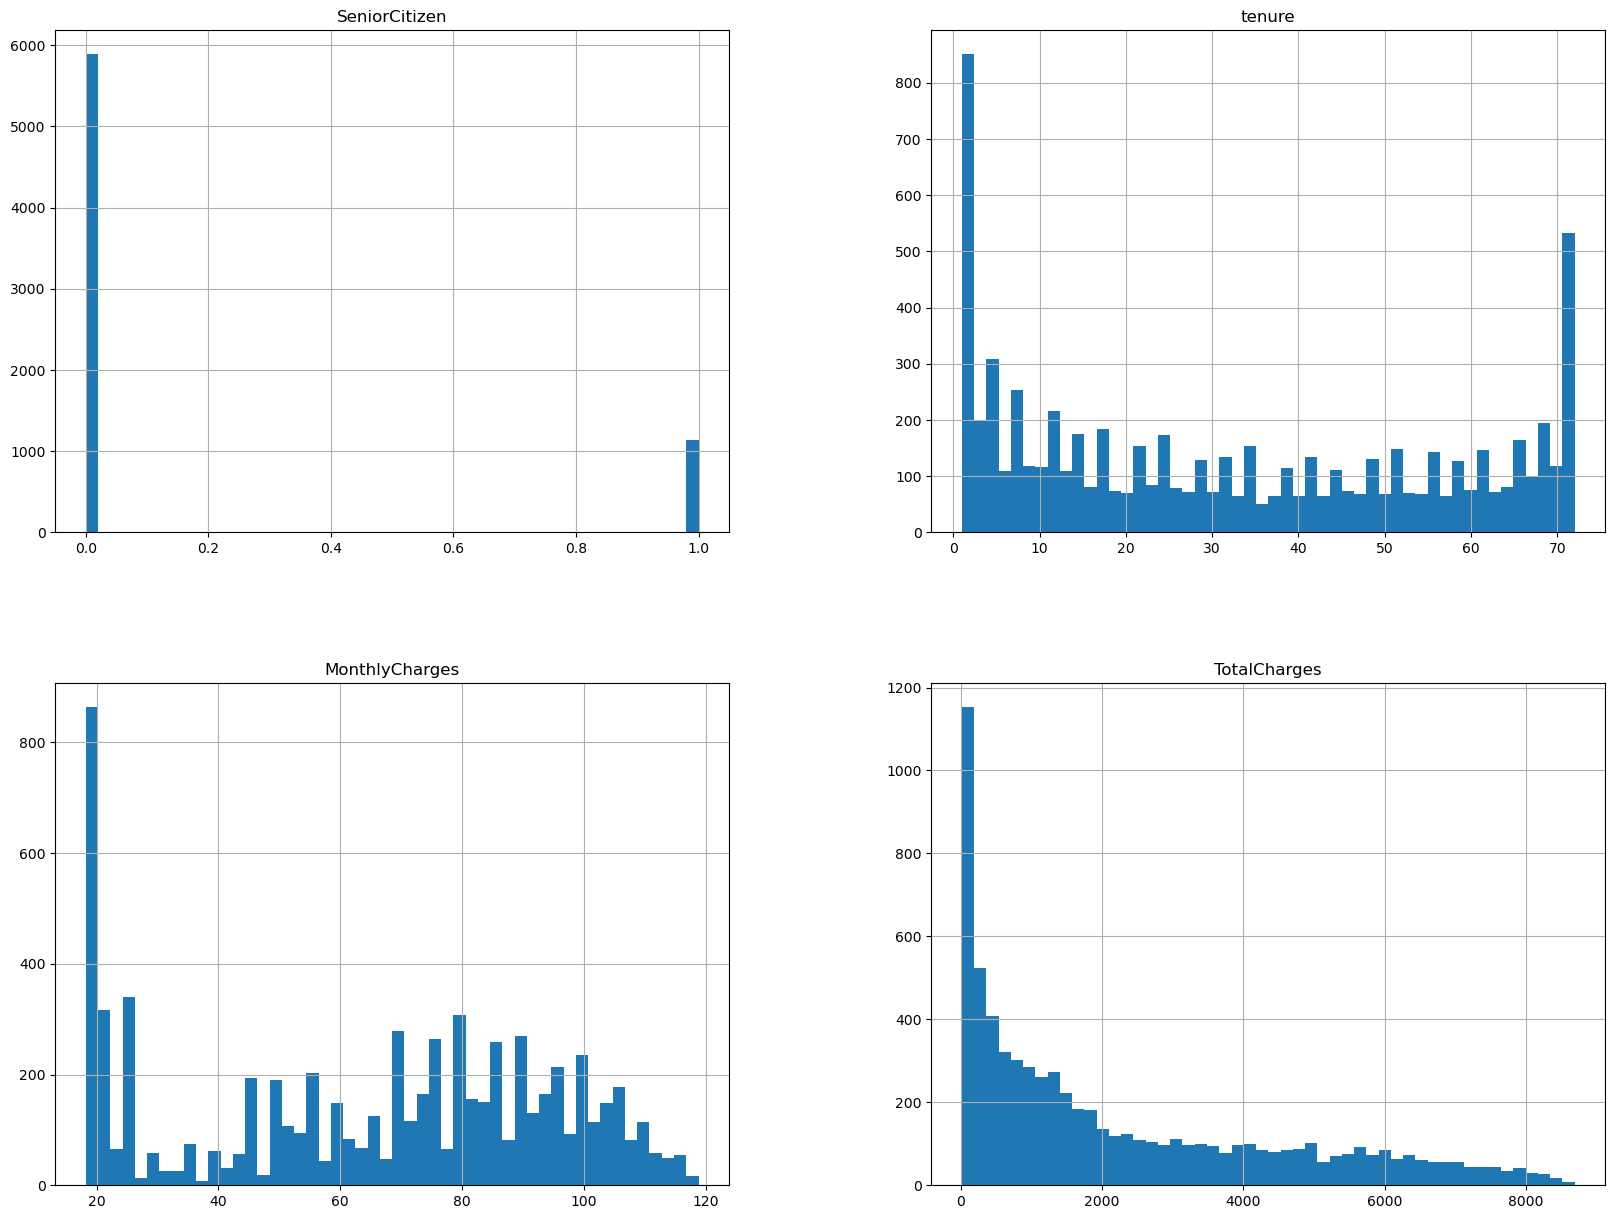

In [ ]:
# EDA - get a feel for the data
import matplotlib.pyplot as plt
telco_churn.hist(bins=50, figsize=(20,15)) 
plt.show()

# senior citizen - marked as 0 or 1
# tenure - too many numbers - i need to check if there is a correlation between tenure and churn (yes/no)
# same w monthly charges and total charges - need to plot them against yes/no


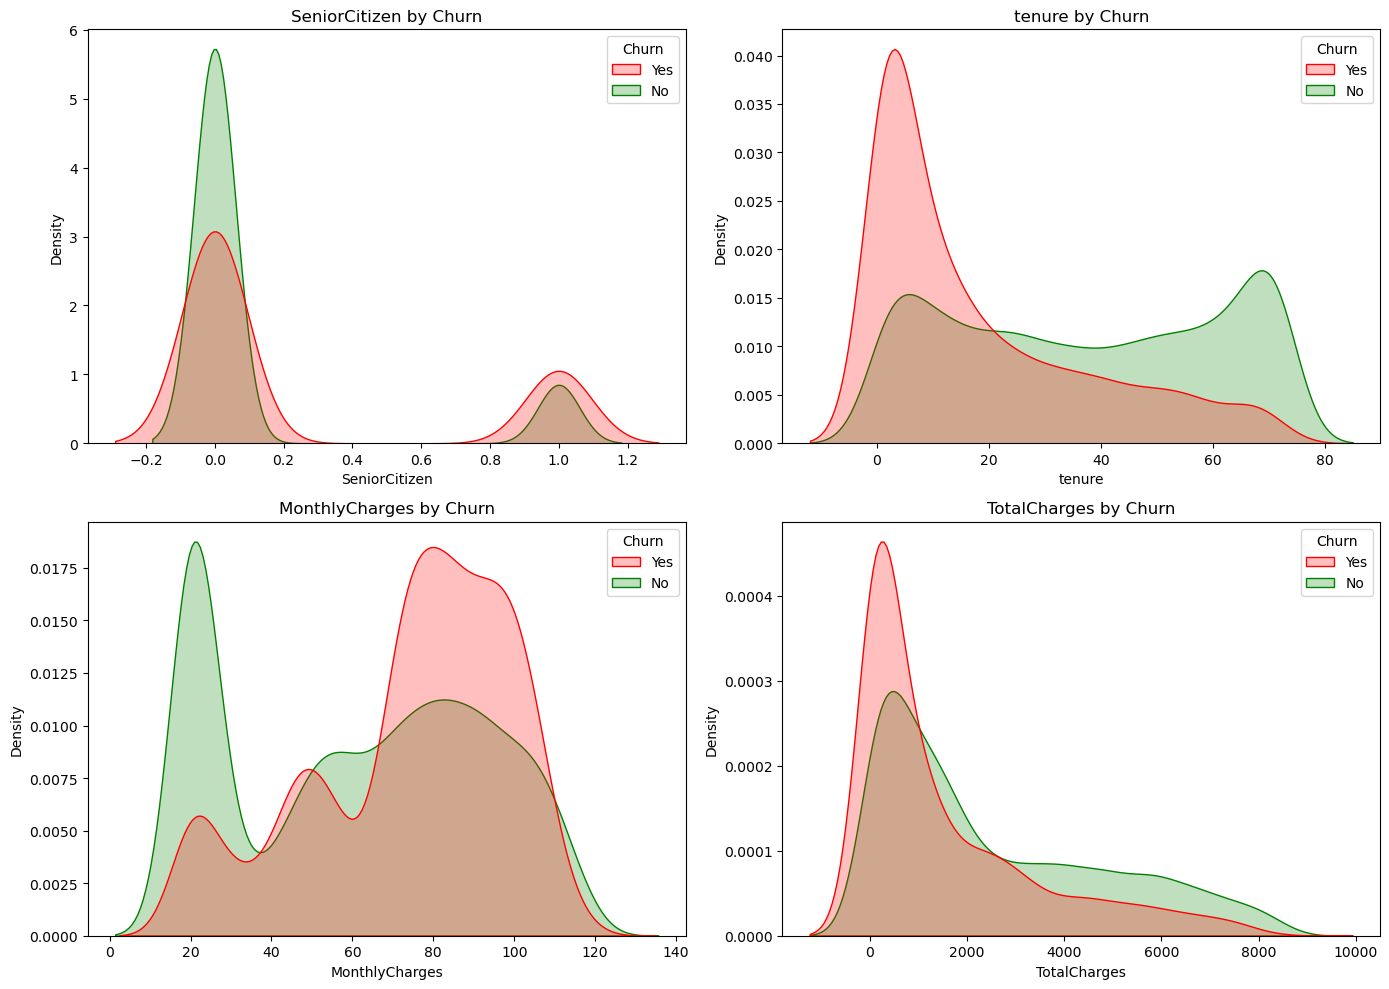

In [23]:
# separate them - check EDA of these numerical variables against churn result 
import seaborn as sns
num_cols = telco_churn.select_dtypes(include=['int64', 'float64']).columns

# set number that appropriates for all the plots
n_cols = 2
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(14, 5 * n_rows))

# set custom colour
palette = {"Yes": "red", "No": "green"}

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=telco_churn, x=col, hue="Churn", hue_order=["Yes", "No"], palette=palette, common_norm=False, fill=True) # show smooth distribution curve
    plt.title(f'{col} by Churn')
    plt.tight_layout()
    
plt.show()

In [ ]:
# check the unique values of object 
for col in telco_churn.select_dtypes(include=['object']).columns:
    print(f"{col}: {telco_churn[col].unique()}")
    
# decide to not merge 'No internet service' with 'No' - since those columns relate back to InternetService - someone can have wifi but not having the onl security

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


PaymentMethod              Churn
Bank transfer (automatic)  No       1284
                           Yes       258
Credit card (automatic)    No       1289
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1296
                           Yes       308
dtype: int64
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308


<Axes: xlabel='PaymentMethod'>

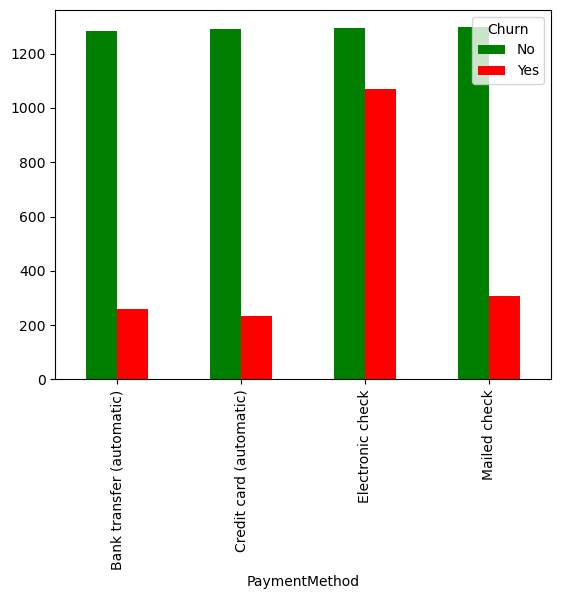

In [ ]:
# plotting - categorical variables - against churn (yes/no)

# testing with one category only
print(telco_churn.groupby(['PaymentMethod', 'Churn']).size()) # count the number of rows in each group directly
grouped = telco_churn.groupby(['PaymentMethod', 'Churn']).size().unstack() 
print(grouped) # pivot the No/Yes row to column, and push Churn up  
grouped.plot(kind='bar', color=['green', 'red'])


In [ ]:
for col in telco_churn.select_dtypes(include=['object']).columns:
    grouped = telco_churn.groupby([col, 'Churn']).size().unstack() 
    
    ax = grouped.plot(kind='bar',
                    color=[palette.get(c, 'grey') for c in grouped.columns],
                    figsize=(6, 4),
                    title=f"{col} vs Churn (counts)")

    ax.set_ylabel("Count")
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)          
    ax.legend(title="Churn")                      
    plt.tight_layout()                           
    plt.show()


In [ ]:
# data encoding - categorical first
df = telco_churn.copy()
cat_data = df.select_dtypes(include=['object']) # only categorical data here
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False) # so we can put them back into df

# separate the binary vs multi column values
binary_cols = [c for c in cat_data if cat_data[c].nunique() == 2]
multi_cols  = [c for c in cat_data if cat_data[c].nunique() > 2]

# label encoder
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    
# one hot encode the multi_cols
ohe_array  = ohe.fit_transform(df[multi_cols]) # ohe expects 2D series, so do not put in individual 1D single column

ohe_cols = ohe.get_feature_names_out(multi_cols)
ohe_df = pd.DataFrame(ohe_array, columns=ohe_cols, index=df.index)

# drop the old multi_cols and concat the new ohe_df
df = pd.concat([df.drop(columns=multi_cols), ohe_df], axis=1)
df # all the categorical values are encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# standardise the numerical values - to range 0-1